In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.widgets import *


In [3]:
ims = search_images_ddg('grizzly bear')
len(ims)

200

In [4]:
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [5]:
dest= 'images/grizzly.jpg'
download_url(ims[0],dest,show_progress=False)

Path('images/grizzly.jpg')

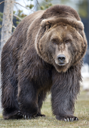

In [10]:
im = Image.open(dest)
im.to_thumb(128,128)

In [6]:
bear_types='grizzly', 'black', 'teddy'
path=Path('bears')


In [7]:
searches='teddy','grizzly','black'
path=Path('bears')

for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
    
        download_images(dest, urls=search_images_ddg( f'{o} bear'))

In [24]:
fns = get_image_files(path)
fns

(#558) [Path('bears/black/e5faf68a-e7a0-4e49-8e3d-062c70d3b393.jpg'),Path('bears/black/3fe40f59-42aa-48f6-b22b-68677f3ca087.jpg'),Path('bears/black/92847737-84d0-4d96-bb70-68c99e9f751f.jpg'),Path('bears/black/fa2e89ab-6495-44a5-85f2-81236aa13df3.jpg'),Path('bears/black/d26c868a-cbb5-4d5a-823f-b2e79592ae03.jpg'),Path('bears/black/f359092a-972b-48b1-9097-c03ab534df0d.jpg'),Path('bears/black/0893b2a5-e6d3-4971-a3d8-6dc74ccdbaec.jpg'),Path('bears/black/3d8617c3-e067-4f27-97ef-9532783c33bd.png'),Path('bears/black/70aeb489-ba21-4a95-a45a-de733e146d9e.jpg'),Path('bears/black/9e728baa-4200-4374-a2a1-4651d268b762.jpg')...]

In [8]:
failed=verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

49

In [9]:
bears=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=[Resize(128)]
)

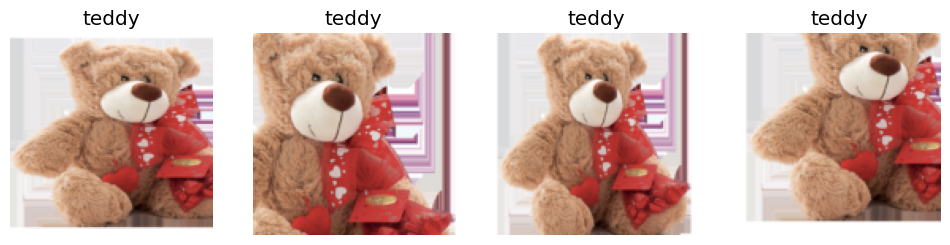

In [10]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [11]:
learn = vision_learner(dls, resnet18, metrics= error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.860765,0.286455,0.048309,00:23


/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.330026,0.215989,0.038647,00:44
1,0.262909,0.214603,0.048309,00:32
2,0.211737,0.199746,0.043478,00:28


/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWar

/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


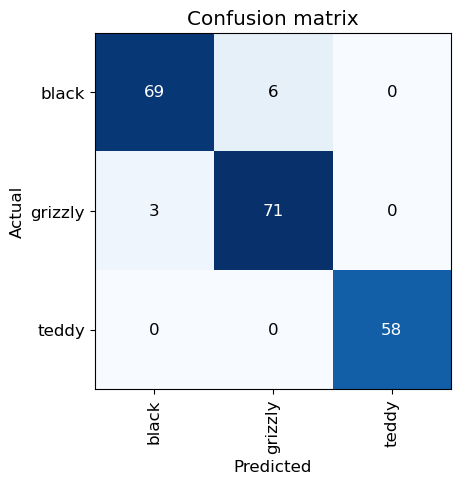

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

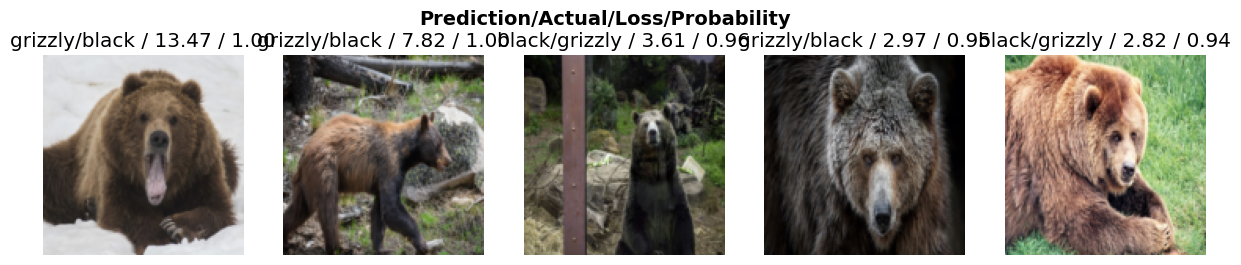

In [13]:
interp.plot_top_losses(5, nrows=1)

In [15]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/ved/mambaforge/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
